# Checks

In [1]:
import os
os.chdir('../../scripts')
import pandas as pd
import matplotlib.pyplot as plt
from post_processing import get_output
from analysis_tools_cython import *
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [10,8]

## Import Data

In [57]:
data = get_output('../output_log/s6_9aug.txt')
print(len(data))
metadata = pd.read_csv('/storage/astro2/phrdhx/tesslcs/sector6lookup.csv')
print(len(metadata[metadata.Magnitude < 13]))

154331
624281


In [4]:
data = data[data.transit_prob == 'maybeTransit']
print(len(data), "after maybeTransit")
data.head()

40737 after maybeTransit


,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
11,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,48102438,-4.58469,-3.78546,1489.11932,0.99999,0.00069,0.27996,0.00076,3.227427e+06,...,965,53.25798,53.25731,0.71970,0.71969,0.00075,0.00075,0.00057,0.00057,maybeTransit
12,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,22483701,-10.72395,-2.91735,1487.70099,1.09308,0.00310,0.81958,2.70931,7.485600e-01,...,895,358.85675,329.46268,2.18815,2.00892,0.00061,0.00058,0.00050,0.00047,maybeTransit
13,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,438079227,-7.45519,-3.18251,1480.28742,1.00116,0.00079,0.30625,1.30826,1.874880e+00,...,541,635.46418,634.68202,3.73802,3.73342,0.00064,0.00064,0.00037,0.00037,maybeTransit
14,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,219413743,-3.51442,-3.25779,1487.57490,0.99984,0.00043,0.35954,0.00011,1.553789e+07,...,889,42.47003,42.46288,0.34812,0.34806,0.00053,0.00053,0.00042,0.00041,maybeTransit
16,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,235544295,-5.75148,-2.91831,1471.26620,1.08342,0.00032,0.23348,22.85781,3.010857e+01,...,108,64.97797,59.78118,0.70628,0.64980,0.00047,0.00045,0.00034,0.00032,maybeTransit


In [21]:
# for i in data.path.head(): #4 x 4 grid for illustration purposes
#     print(i)
#     lc, lc_info = import_XRPlightcurve(i,sector=6)
#     lc = lc['time','corrected flux','quality','flux error']
#     processing(lc, lc_info=lc_info,make_plots=True,method='median')
#     #plt.figure(figsize=(12,5))
#     #plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
#     #plt.title(f' TIC {lc_info[0]}')
#     #plt.show()


## Removing worst anomalies

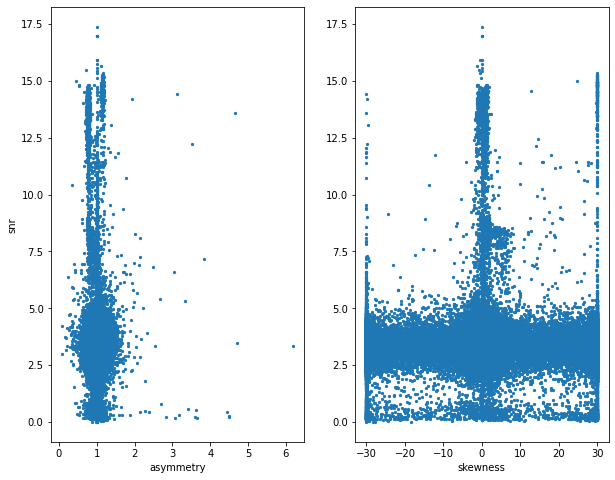

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

In [6]:
data = data[(data.asym_score <= 3) & (data.skewness >= -100) & (data.skewness <= 100)].reset_index(drop=True)
data

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,48102438,-4.58469,-3.78546,1489.11932,0.99999,0.00069,0.27996,0.00076,3.227427e+06,...,965,53.25798,53.25731,0.71970,0.71969,0.00075,0.00075,0.00057,0.00057,maybeTransit
1,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,22483701,-10.72395,-2.91735,1487.70099,1.09308,0.00310,0.81958,2.70931,7.485600e-01,...,895,358.85675,329.46268,2.18815,2.00892,0.00061,0.00058,0.00050,0.00047,maybeTransit
2,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,438079227,-7.45519,-3.18251,1480.28742,1.00116,0.00079,0.30625,1.30826,1.874880e+00,...,541,635.46418,634.68202,3.73802,3.73342,0.00064,0.00064,0.00037,0.00037,maybeTransit
3,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,219413743,-3.51442,-3.25779,1487.57490,0.99984,0.00043,0.35954,0.00011,1.553789e+07,...,889,42.47003,42.46288,0.34812,0.34806,0.00053,0.00053,0.00042,0.00041,maybeTransit
4,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,235544295,-5.75148,-2.91831,1471.26620,1.08342,0.00032,0.23348,22.85781,3.010857e+01,...,108,64.97797,59.78118,0.70628,0.64980,0.00047,0.00045,0.00034,0.00032,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40715,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,172120810,-4.71447,-4.21483,1476.80617,1.57559,0.00024,0.12794,-30.00000,4.758167e+02,...,374,28.46595,18.76402,1.09484,0.72169,0.00044,0.00035,0.00033,0.00025,maybeTransit
40716,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,333049011,-7.45657,-2.90717,1473.55716,0.99988,0.00003,0.01566,20.43807,4.000000e-05,...,218,706.55078,706.63865,4.64836,4.64894,0.00064,0.00064,0.00052,0.00052,maybeTransit
40717,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,119405508,-12.50879,-3.50130,1470.84694,0.81978,0.00003,0.02010,-26.04630,6.562455e+05,...,86,2845.60781,3441.56856,18.01018,21.78208,0.00124,0.00137,0.00088,0.00105,maybeTransit
40718,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,95331897,-6.74189,-3.17147,1475.36965,1.22546,0.00069,0.56651,9.08101,7.922340e+00,...,305,286.38513,232.90048,3.87007,3.14730,0.00049,0.00044,0.00039,0.00034,maybeTransit


### Scatterplot

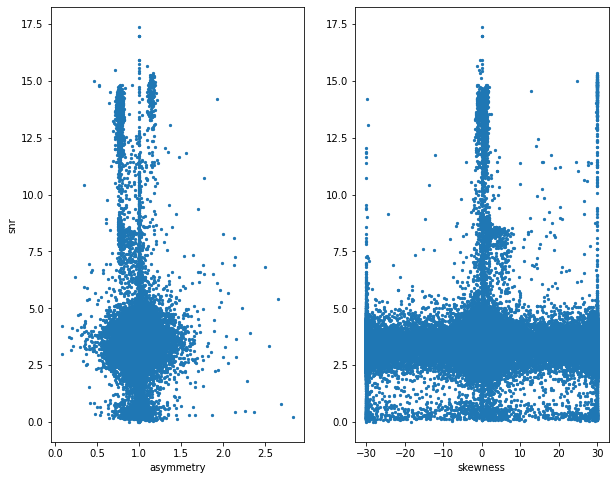

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a1a14dfd0>]],
      dtype=object)

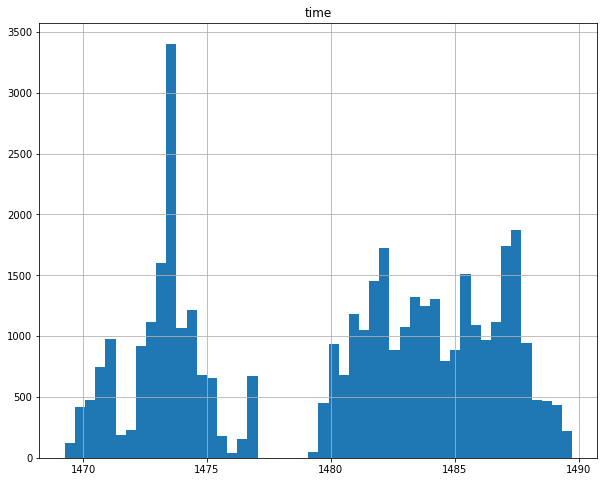

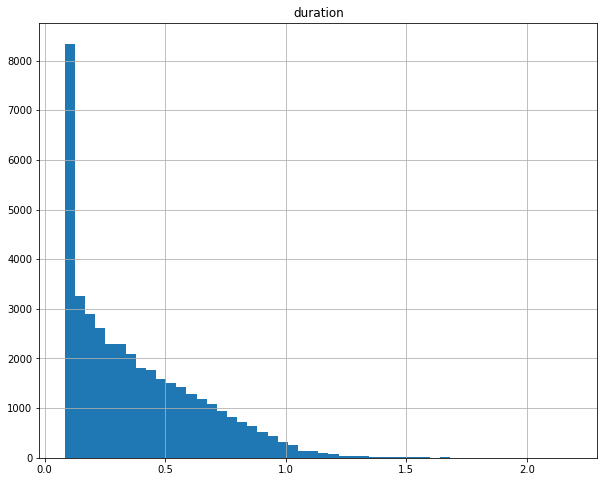

In [8]:
data.hist('time',bins=50)
data.hist('duration',bins=50)

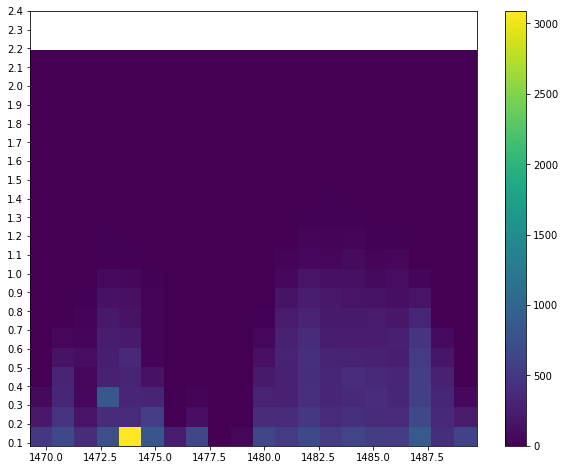

In [9]:
plt.hist2d(data['time'], data['duration'], bins=[20, 20])
plt.yticks(ticks=np.arange(0.1,2.5,0.1))
plt.colorbar()
plt.show()

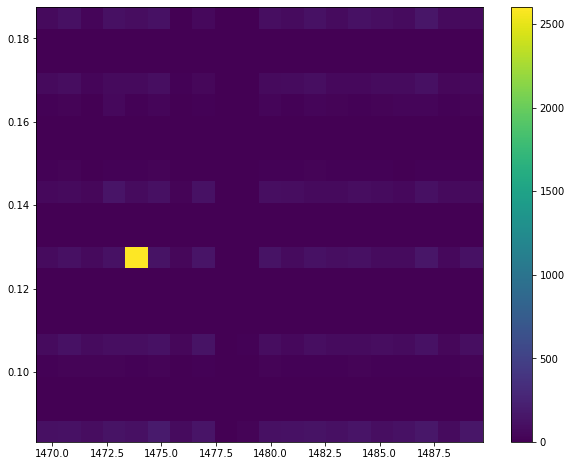

In [10]:
plt.hist2d(data['time'][data.duration <= 0.2], data['duration'][data.duration <= 0.2], bins=[20, 20])
plt.colorbar()
plt.show()

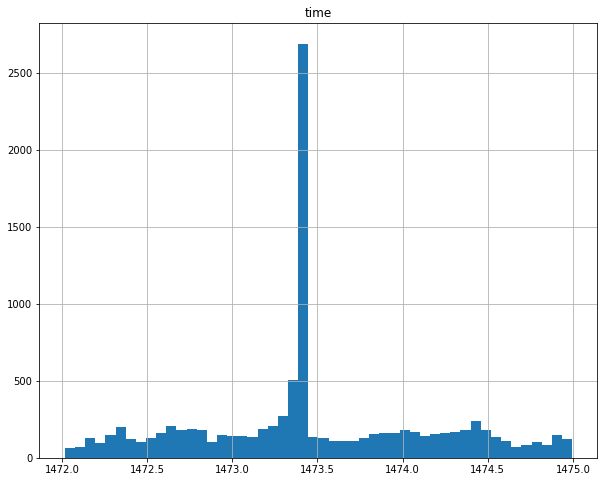

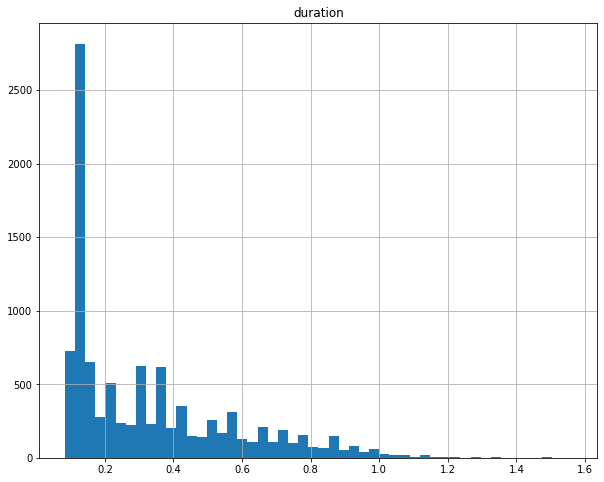

In [11]:
data.loc[(data.time >=1472) & (data.time <= 1475)].hist('time',bins=50,)
data.loc[(data.time >=1472) & (data.time <= 1475)].hist('duration',bins=50)
plt.show()

There is a second spike around 0.3 days... Proven in `asym_score vs depth` plots

(0.0, 0.2)

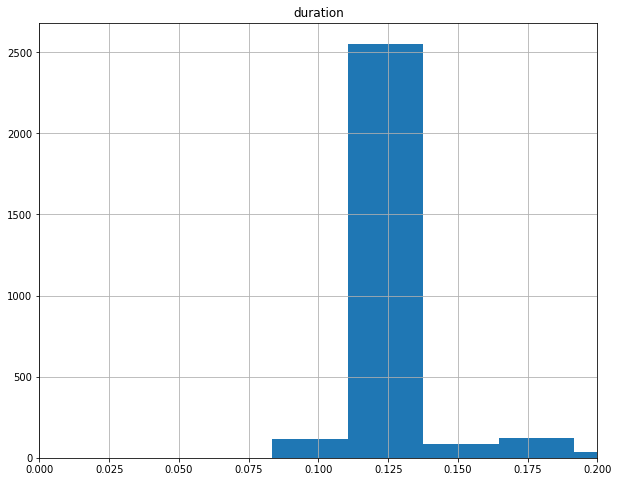

In [12]:
data.loc[(data.time >=1473) & (data.time <= 1473.5)].hist('duration',bins=50)
plt.xlim([0,0.2])

In [13]:
to_cut = data[(data['duration'] <= 0.15) & (data['time'] >= 1473.25) & (data['time'] <= 1473.5)].reset_index(drop=True)
len(to_cut)

2602

In [14]:
data.drop(data[(data['duration'] <= 0.15) & (data['time'] >= 1473.433) & (data['time'] <= 1473.5)].index,inplace=True)
data.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,48102438,-4.58469,-3.78546,1489.11932,0.99999,0.00069,0.27996,0.00076,3.227427e+06,...,965,53.25798,53.25731,0.71970,0.71969,0.00075,0.00075,0.00057,0.00057,maybeTransit
1,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,22483701,-10.72395,-2.91735,1487.70099,1.09308,0.00310,0.81958,2.70931,7.485600e-01,...,895,358.85675,329.46268,2.18815,2.00892,0.00061,0.00058,0.00050,0.00047,maybeTransit
2,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,438079227,-7.45519,-3.18251,1480.28742,1.00116,0.00079,0.30625,1.30826,1.874880e+00,...,541,635.46418,634.68202,3.73802,3.73342,0.00064,0.00064,0.00037,0.00037,maybeTransit
3,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,219413743,-3.51442,-3.25779,1487.57490,0.99984,0.00043,0.35954,0.00011,1.553789e+07,...,889,42.47003,42.46288,0.34812,0.34806,0.00053,0.00053,0.00042,0.00041,maybeTransit
4,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,235544295,-5.75148,-2.91831,1471.26620,1.08342,0.00032,0.23348,22.85781,3.010857e+01,...,108,64.97797,59.78118,0.70628,0.64980,0.00047,0.00045,0.00034,0.00032,maybeTransit


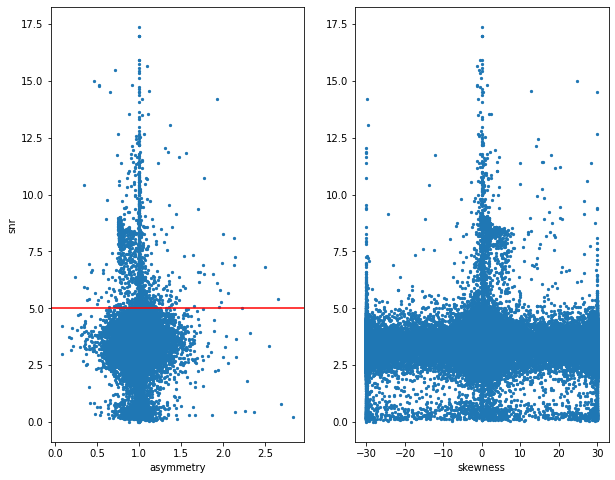

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(data.asym_score,abs(data.snr),s=5)
ax[0].set_xlabel("asymmetry")
ax[1].set_xlabel("skewness")
ax[0].set_ylabel("snr")
ax[1].scatter(data.skewness,abs(data.snr),s=5)
ax[0].axhline(5,c='red')

plt.show()

---

## SNR cut

In [16]:
data_new = data[abs(data.snr) >= 5].reset_index(drop=True)

In [17]:
data_new[data_new.asym_score <= 0.2].head(10)

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob


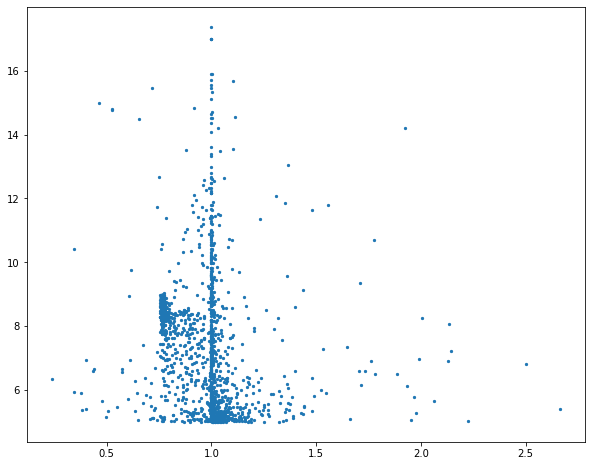

In [18]:
plt.scatter(data_new['asym_score'],abs(data_new.snr),s=5)

---
## Other property cuts

### Import EB catalogue

In [21]:
ebs = pd.read_csv('../eb_cat.txt')
tois = pd.read_csv('../exofop_tess_tois.csv')

tois = tois.reset_index()
tois = tois['level_0'][1:]
tois = tois.values.astype(int)



In [24]:
data_new

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,n,chisq_gauss,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob
0,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,147367977,-17.68132,-7.51427,1481.41127,1.00735,0.02017,0.06290,-0.56814,0.39951,...,595,189.48682,187.57793,4.98650,4.93626,0.00266,0.00265,0.00205,0.00206,maybeTransit
1,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,381977181,-9.40107,-5.78758,1476.84518,1.04831,0.00446,0.04075,-30.00000,26310.81447,...,368,14478.13700,13816.21877,723.90685,690.81094,0.01442,0.01409,0.00990,0.00976,maybeTransit
2,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,381977351,-13.16631,-6.93674,1476.80356,0.40328,0.05124,0.54743,30.00000,43.35208,...,366,200122.95539,167665.08810,3227.78960,2704.27561,0.02256,0.03553,0.01349,0.02921,maybeTransit
3,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,234080337,-15.49421,-8.86215,1486.64140,1.02940,0.00077,0.07886,1.43976,0.65164,...,846,78.96996,76.12120,1.79477,1.73003,0.00042,0.00041,0.00032,0.00032,maybeTransit
4,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,100480359,-5.67623,-5.22839,1482.41002,1.00840,0.00068,0.32283,-1.74329,2.47229,...,641,43.31550,42.95512,0.98444,0.97625,0.00064,0.00064,0.00052,0.00053,maybeTransit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,176980774,-8.70887,-7.88806,1476.84384,0.86783,0.00009,0.06288,29.99999,8840.47830,...,368,166.77345,153.51672,6.41436,5.90449,0.00039,0.00042,0.00021,0.00027,maybeTransit
1589,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,124749237,-31.27133,-8.68248,1485.63918,0.99776,0.01633,0.13364,-0.19491,6.11602,...,796,10029.67446,10007.89070,96.43918,96.22972,0.00349,0.00350,0.00194,0.00194,maybeTransit
1590,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,333046317,-14.17793,-5.57108,1481.99466,1.00789,0.00053,0.18654,-2.11745,1.45255,...,623,255.22705,253.32992,2.20023,2.18388,0.00045,0.00045,0.00035,0.00035,maybeTransit
1591,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,250542976,-12.64612,-8.25106,1475.12036,1.05827,0.00063,0.07652,-4.07535,2.88941,...,293,79.19954,74.74310,2.47499,2.33572,0.00108,0.00105,0.00064,0.00061,maybeTransit


In [25]:
ebs_found = data_new[data_new['TIC_ID'].isin(ebs['ID'])]
tois_found =  data_new[data_new['TIC_ID'].isin(tois)]

In [26]:
# Step 1: Create a boolean mask
data_new['is_eb'] = data_new['TIC_ID'].isin(ebs['ID'])
data_new['is_toi'] = data_new['TIC_ID'].isin(tois)

In [27]:
log_peak_power = np.log10(data_new['peak_lspower'])
log_depth = np.log10(abs(data_new['depth']))

In [28]:
len(data_new)

1593

### Duration vs depth

In [29]:
frac_dur = data_new.duration[(data_new.is_eb == False) & (data_new.is_toi == False)]
frac_depth = data_new.depth[(data_new.is_eb == False) & (data_new.is_toi == False)]

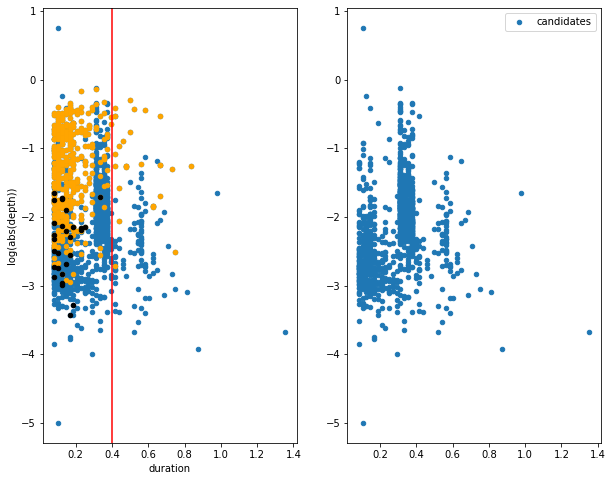

In [30]:
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(data_new.duration,log_depth,s=20,label='candidates',zorder=1)
ax[0].scatter(ebs_found.duration,np.log10(abs(ebs_found['depth'])),c='orange',s=20,label='ebs')
ax[0].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')

ax[1].scatter(frac_dur,np.log10(abs(frac_depth)),s=20,label='candidates',zorder=1)
#ax[1].scatter(tois_found.duration,np.log10(abs(tois_found['depth'])),c='black',s=20,label='tois')



ax[0].set_xlabel('duration')
ax[0].set_ylabel('log(abs(depth))')
ax[0].axvline(0.4,c='red')

plt.legend()

### Duration vs Peak_lspower

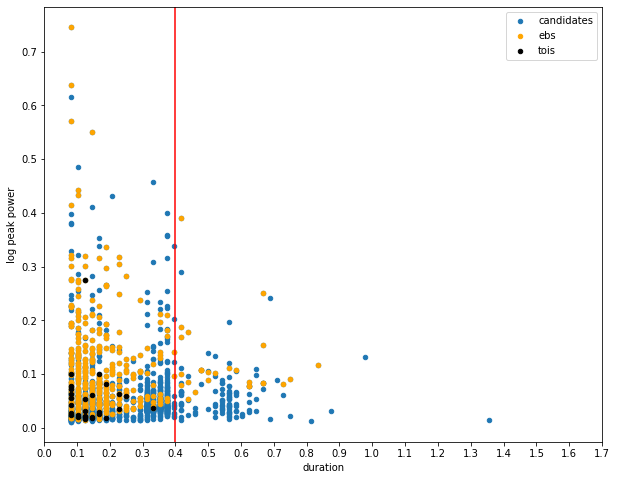

In [31]:
plt.scatter(data_new.duration,data_new.peak_lspower,s=20,label='candidates')
plt.scatter(ebs_found.duration,ebs_found.peak_lspower,c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,tois_found.peak_lspower,c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

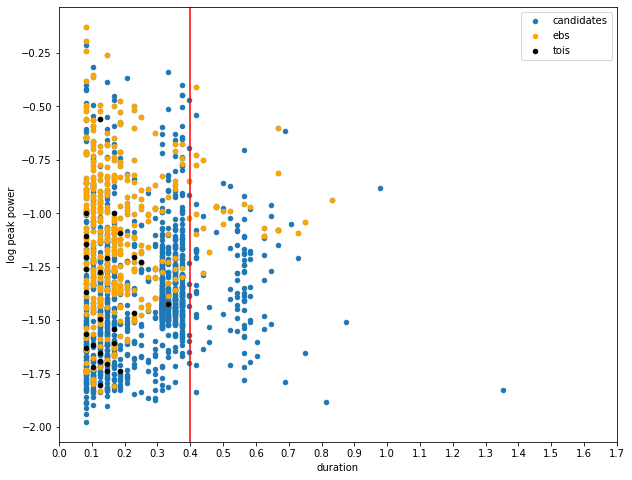

In [32]:
plt.scatter(data_new.duration,log_peak_power,s=20,label='candidates')
plt.scatter(ebs_found.duration,np.log10(ebs_found['peak_lspower']),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,np.log10(tois_found['peak_lspower']),c='black',s=20,label='tois')

plt.xticks(np.arange(0,1.75,0.1))
plt.xlabel('duration')
plt.ylabel('log peak power')
plt.axvline(0.4,c='red')
plt.legend()

In [33]:
crossref_tot = (ebs_found.duration) + (tois_found.duration) / data_new.duration
crosref_ebs = (ebs_found.duration) / data_new.duration
cross_ref_toi = (tois_found.duration) / data_new.duration

### duration vs SNR

Text(0, 0.5, 'snr')

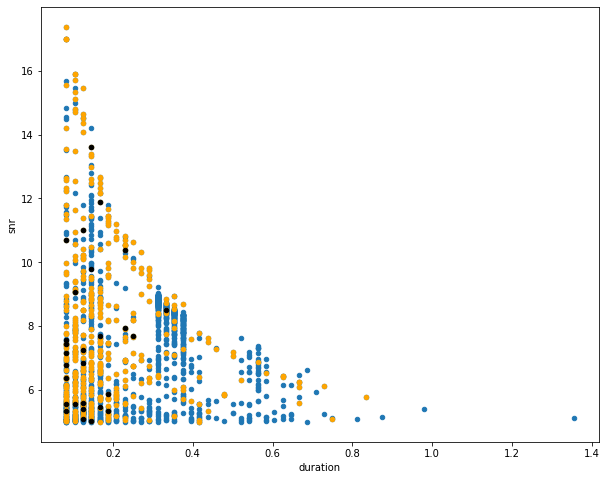

In [34]:
plt.scatter(data_new.duration,abs(data_new.snr),s=20,label='candidates')
plt.scatter(ebs_found.duration,abs(ebs_found.snr),c='orange',s=20,label='ebs')
plt.scatter(tois_found.duration,abs(tois_found.snr),c='black',s=20,label='tois')
plt.xlabel('duration')
plt.ylabel('snr')

### asymmetry vs depth

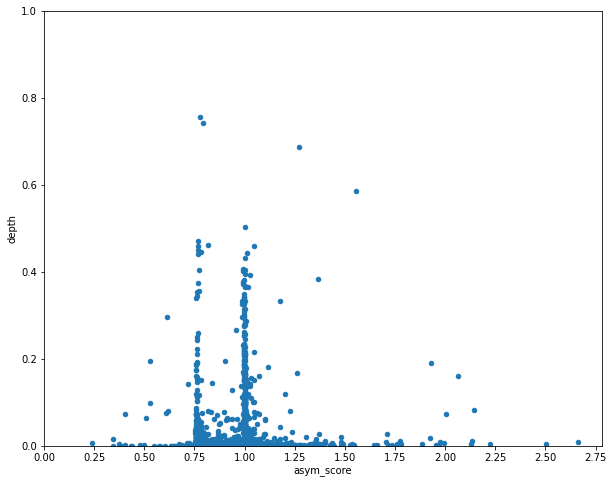

In [35]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates')
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.show()

In [36]:
test = data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)]

#### Explore spike at ~0.8

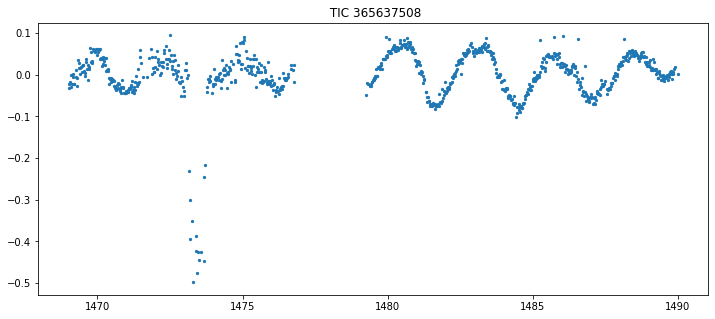

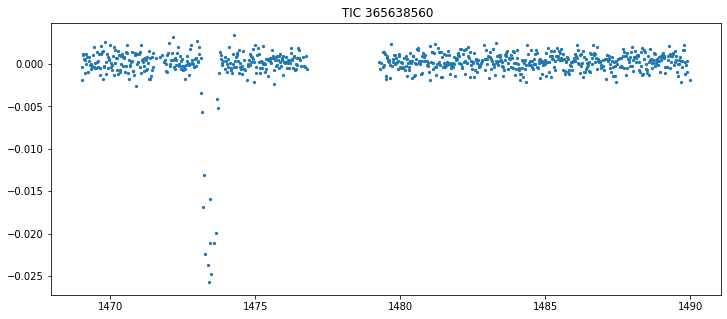

In [37]:
for i in data_new[(data_new.asym_score >=0.75) & (data_new.asym_score <= 0.85)].path.head(2): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Spike at `asym_score ~ 1`

Expected. But nevertheless, let's see

111


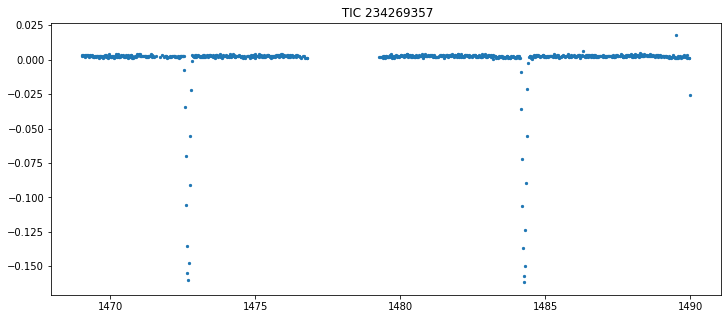

111


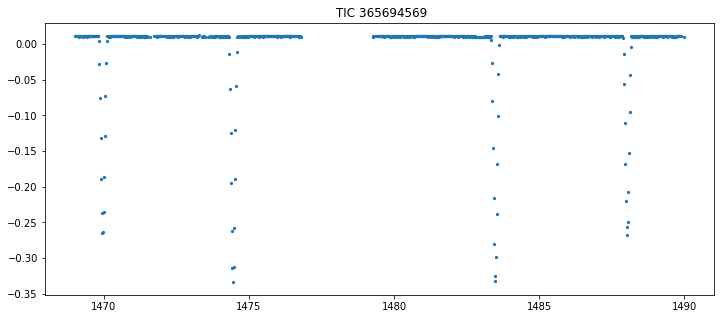

In [38]:
for i in data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)].path.head(2): #4 x 4 grid for illustration purposes
    print(len(data_new[(data_new.asym_score >=0.9) & (data_new.asym_score <= 1) & (abs(data_new.depth) >= 0.1)]))
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    plt.figure(figsize=(12,5))
    plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    plt.title(f' TIC {lc_info[0]}')
    plt.show()

### Make cut on 0.4 day duration

In [39]:
data_new.drop(data_new[data_new['duration'] <= 0.4].index,inplace=True)

In [40]:
data_new.head()

,path,TIC_ID,signal,snr,time,asym_score,amplitude,width,skewness,skewness_err,...,chisq_skew,rchisq_gauss,rchisq_skew,rmse_gauss,rmse_skew,mae_gauss,mae_skew,transit_prob,is_eb,is_toi
18,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,119689578,-9.93499,-6.53815,1480.97420,0.99246,0.00124,0.37095,4.61365,6.52792,...,1031.33758,6.47775,6.52745,0.00197,0.00198,0.00124,0.00126,maybeTransit,False,False
21,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_11...,119689952,-9.53722,-5.49828,1480.99504,1.02597,0.00121,0.33495,-30.00000,130.49315,...,693.74974,4.04766,3.94176,0.00182,0.00179,0.00113,0.00113,maybeTransit,False,False
26,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,365746782,-19.35356,-7.31018,1473.41228,0.95881,0.00372,0.31883,6.52423,2.95372,...,923.93038,7.20287,5.84766,0.00213,0.00218,0.00106,0.00109,maybeTransit,False,False
29,/tmp/tess/tesslcs_sector_6_104/2_min_cadence_t...,365747781,-9.05362,-5.25317,1473.39141,0.91312,0.00072,0.17278,-0.32598,9.07848,...,126.97013,0.74804,0.69764,0.00051,0.00054,0.00041,0.00042,maybeTransit,False,False
47,/tmp/tess/tesslcs_sector_6_104/tesslcs_tmag_10...,229172474,-17.04166,-6.50876,1473.41228,0.89494,0.00165,0.16819,0.00134,434604.85926,...,968.87502,6.74347,6.13212,0.00113,0.00120,0.00073,0.00076,maybeTransit,False,False


### asym_score vs depth
depth spike at 0.3 days gone. 
- Most if not all the failed lightcurves should have been cut now.

In [41]:
from matplotlib.colors import ListedColormap

In [42]:
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

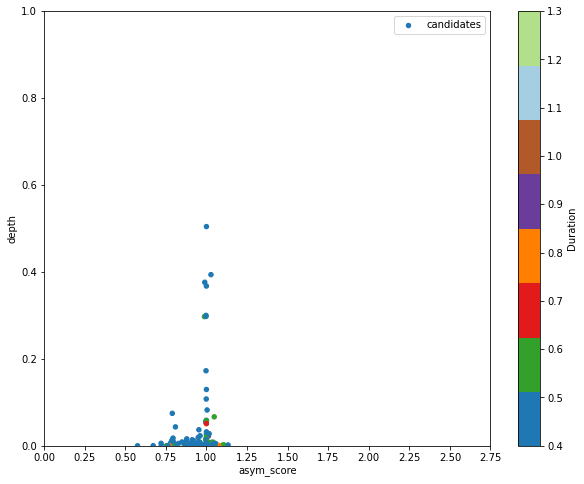

In [43]:
bin_interval = 0.1
bins = np.arange(0, np.max(data_new.duration) + bin_interval, bin_interval)

# Use np.digitize to map duration values to their corresponding bins
duration_binned = bins[np.digitize(data_new.duration, bins) - 1]


plt.scatter(data_new.asym_score,abs(data_new.depth),c=duration_binned,s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a19f897d0>]],
      dtype=object)

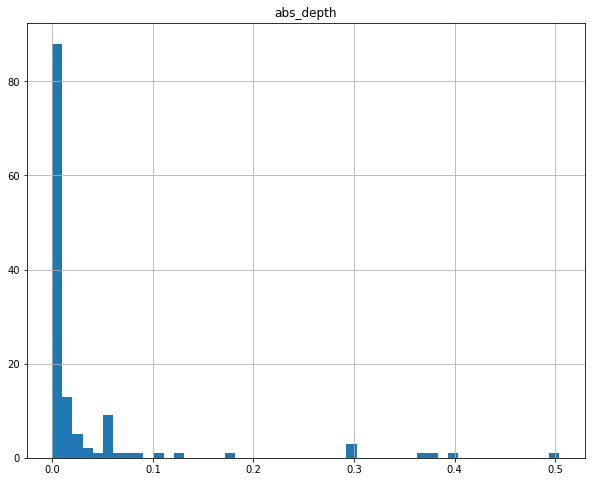

In [44]:
data_new['abs_depth'] = abs(data_new.depth)
data_new.hist('abs_depth',bins=50)

Most are low amplitude transits

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a1c2f7410>]],
      dtype=object)

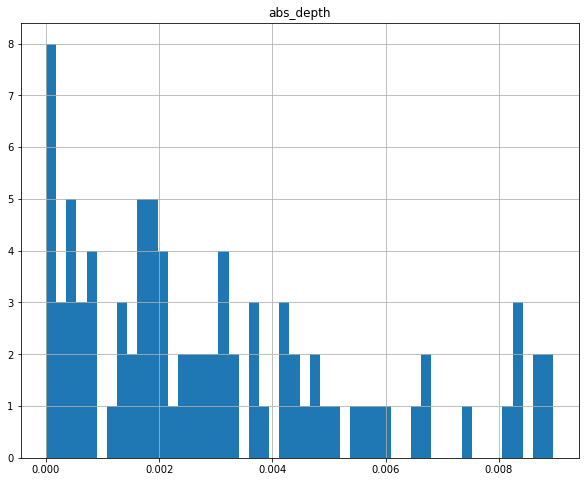

In [45]:
data_new[data_new.abs_depth <= 0.01].hist('abs_depth',bins=50)

In [46]:
for i in data_new[data_new.asym_score <= 0.1].path.head(10): #4 x 4 grid for illustration purposes
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',make_plots=True)
    #plt.figure(figsize=(12,5))
    #plt.scatter(lc['time'],normalise_flux(lc['corrected flux']), s=5)
    #plt.title(f' TIC {lc_info[0]}')
    #plt.show()

### Make cut at `> 0.1` and `< 0` depth

In [47]:
data_new.drop(data_new[(data_new['abs_depth'] >= 0.1)].index,inplace=True)

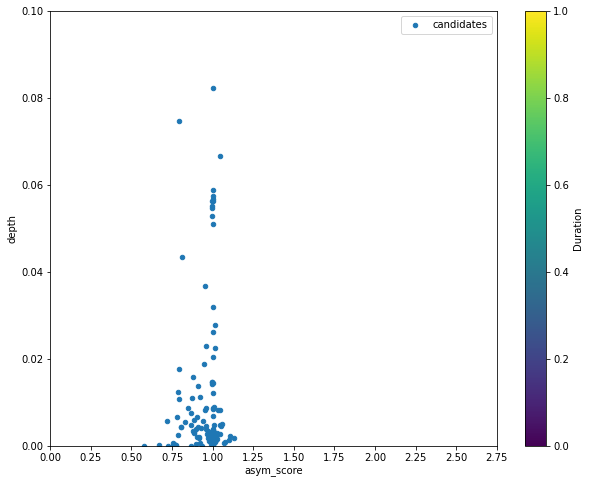

In [49]:
plt.scatter(data_new.asym_score,abs(data_new.depth),s=20,label='candidates',cmap=custom_cmap)
plt.ylim([0,0.1])
plt.xlabel('asym_score')
plt.ylabel('depth')
plt.xticks(np.arange(0,3,0.25))
plt.legend()
plt.colorbar(label='Duration')
plt.show()

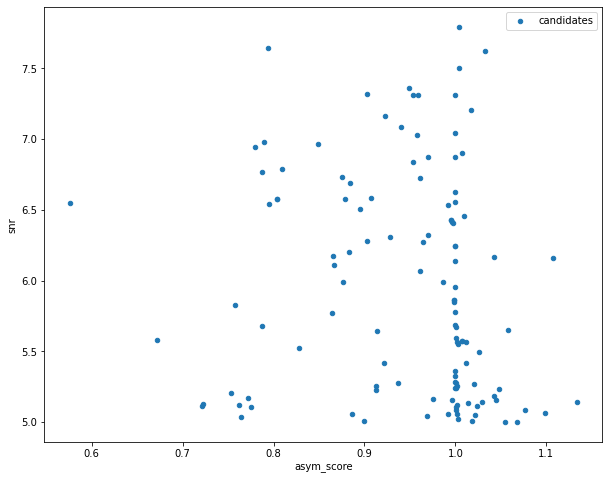

In [50]:
plt.scatter(data_new.asym_score,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('asym_score')
plt.ylabel('snr')
plt.legend()
plt.show()

- 0.1 == 10% depth
- 0.01 == 1% depth
- 0.001 == 0.1% depth

### SNR vs depth

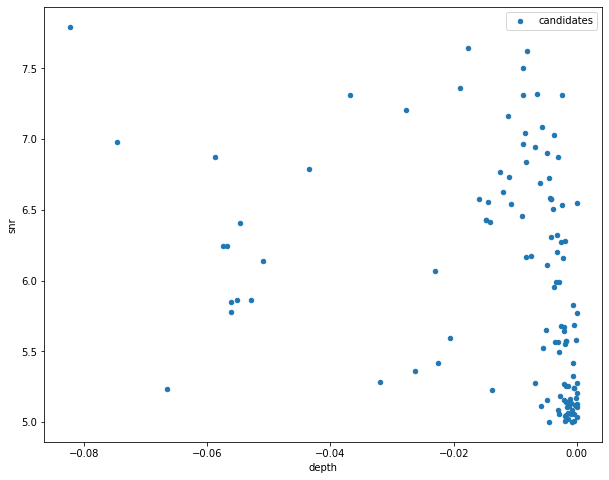

In [51]:
plt.scatter(data_new.depth,abs(data_new.snr),s=20,label='candidates',cmap=custom_cmap)
plt.xlabel('depth')
plt.ylabel('snr')
plt.legend()
plt.show()

## Make SOM Cutouts

In [77]:
os.getcwd()

'/home/astro/phrdhx/automated_exocomet_hunt/scripts'

In [78]:
os.chdir('../')
for i in data_new.path:
    lc, lc_info = import_XRPlightcurve(i,sector=6)
    lc = lc['time','corrected flux','quality','flux error']
    results, _ = processing(lc,lc_info=lc_info,method='median',som_cutouts=True)
    #plt.scatter(data['TIME'],data['PDCSAP_FLUX'],s=2)